# Machine Learning using Python 
# Exam – Paper 1
## Part II: Time Series
## Problem Statements & Tasks:
### Q1. Get the modal price of onion for each month for the Mumbai market (Hint: set monthly date as index and drop redundant columns)
### Q2. Build time series model and check the performance of the model using RMSE
### Q3. Plot ACF and PACF plots [5]
### Q4. Exponential smoothing using Holt-Winter’s technique and Forecast onion price for Mumbai market

# Importing Necessary Libraries:

In [1]:
import warnings
import itertools
import numpy as np
from dateutil.parser import parse 
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib as mpl
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Importing the data:

In [2]:
df =pd.read_csv('MonthWiseMarketArrivals_Clean.csv')

# EDA:

In [3]:
df

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012
...,...,...,...,...,...,...,...,...,...,...
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014


In [4]:
df.sample(5)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6262,MAHUVA(GUJ),December,2009,192596,871,1845,1383,GUJ,MAHUVA,December-2009
6422,MANDSOUR(MP),May,2007,1843,1609,5301,1781,MP,MANDSOUR,May-2007
8740,SAIKHEDA(MS),October,1997,23148,129,376,315,MS,SAIKHEDA,October-1997
6819,NAGPUR,February,2010,73649,993,1285,1138,MS,NAGPUR,February-2010
2851,DINDORI(MS),July,2009,2991,470,694,662,MS,DINDORI,July-2009


In [5]:
df.shape

(10227, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [7]:
df.describe()

,year,quantity,priceMin,priceMax,priceMod
count,10227.000000,1.022700e+04,10227.000000,10227.000000,10227.000000
mean,2009.022294,7.660488e+04,646.944363,1212.760731,984.284345
std,4.372841,1.244087e+05,673.121850,979.658874,818.471498
min,1996.000000,2.000000e+01,16.000000,145.000000,80.000000
25%,2006.000000,8.898000e+03,209.000000,557.000000,448.000000
50%,2009.000000,2.746000e+04,440.000000,923.000000,747.000000
75%,2013.000000,8.835650e+04,828.000000,1527.000000,1248.000000
max,2016.000000,1.639032e+06,6000.000000,8192.000000,6400.000000


In [8]:
df.describe(include='all')

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
count,10227,10227,10227.000000,1.022700e+04,10227.000000,10227.000000,10227.000000,10227,10227,10227
unique,120,12,NaN,NaN,NaN,NaN,NaN,21,117,242
top,LASALGAON(MS),February,NaN,NaN,NaN,NaN,NaN,MS,LASALGAON,September-2015
freq,242,930,NaN,NaN,NaN,NaN,NaN,4354,242,97
mean,NaN,NaN,2009.022294,7.660488e+04,646.944363,1212.760731,984.284345,NaN,NaN,NaN
std,NaN,NaN,4.372841,1.244087e+05,673.121850,979.658874,818.471498,NaN,NaN,NaN
min,NaN,NaN,1996.000000,2.000000e+01,16.000000,145.000000,80.000000,NaN,NaN,NaN
25%,NaN,NaN,2006.000000,8.898000e+03,209.000000,557.000000,448.000000,NaN,NaN,NaN
50%,NaN,NaN,2009.000000,2.746000e+04,440.000000,923.000000,747.000000,NaN,NaN,NaN
75%,NaN,NaN,2013.000000,8.835650e+04,828.000000,1527.000000,1248.000000,NaN,NaN,NaN


In [9]:
# Checking for missing values:
df.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

### No missing values present in the data.

# Task Q1. Get the modal price of onion for each month for the Mumbai market (Hint: set monthly date as index and drop redundant columns)

In [10]:
mop=pd.concat([df.date,df.priceMod],axis=1)

In [11]:
mop.set_index('date')

,priceMod
date,
January-2005,446
January-2006,563
January-2010,1460
January-2011,3433
January-2012,605
...,...
December-2011,526
December-2012,1136
December-2013,1177


In [12]:
df.date = pd.DatetimeIndex(df.date)

In [13]:
df.index = pd.PeriodIndex(df.date, freq="M")
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2005-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
2006-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2010-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
2011-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
2012-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [14]:
df_M=df_Mumbai = df.loc[df.city == "MUMBAI"].copy()
df_Mumbai.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2004-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01
2005-01,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,2005-01-01
2006-01,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,2006-01-01
2007-01,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,2007-01-01
2008-01,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,2008-01-01


In [15]:
df_Mumbai = df_Mumbai.drop(["market","date","year","quantity","priceMin","priceMax","state","city"], axis=1)
df_Mumbai.head()

,month,priceMod
date,,
2004-01,January,849
2005-01,January,387
2006-01,January,402
2007-01,January,997
2008-01,January,448


# Got the modal price of onion for each month for the Mumbai market

# Task Q2. Build time series model and check the performance of the model using RMSE

In [16]:
model_mean_pred = df.priceMod.mean()

In [17]:
# Let us store this as our Mean Predication Value
df["priceMod"] = np.exp(model_mean_pred)

<AxesSubplot:xlabel='date'>

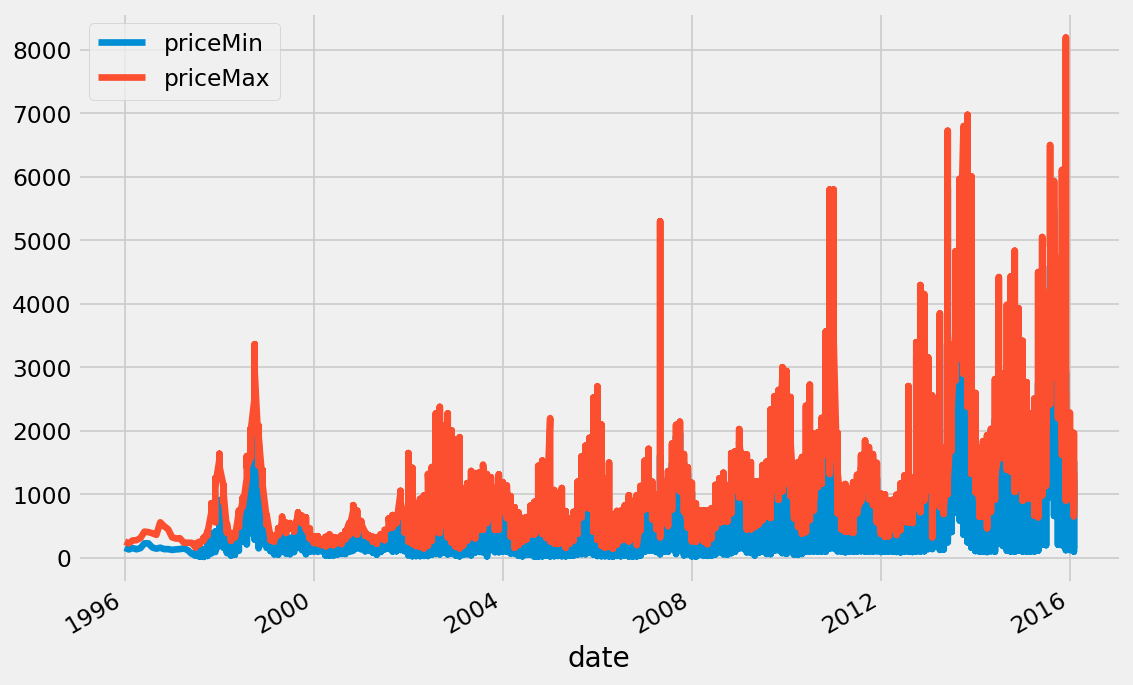

In [18]:
df.plot(kind="line", x="date", y = ["priceMin", "priceMax"])

In [19]:
def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [20]:
model_mean_RMSE = RMSE(df.priceMin, df.priceMax)
model_mean_RMSE

837.8155792022982

In [21]:
# Save this in a dataframe
dfResults = pd.DataFrame(columns = ["Model", "Forecast", "RMSE"])
dfResults.head()

,Model,Forecast,RMSE


In [22]:
dfResults.loc[0,"Model"] = "Mean"
dfResults.loc[0,"Forecast"] = np.exp(model_mean_pred)
dfResults.loc[0,"RMSE"] = model_mean_RMSE
dfResults.head()

,Model,Forecast,RMSE
0,Mean,inf,837.815579


# Built a time series model and checked the performance of the model using RMSE

# Task Q3. Plot ACF and PACF plots

In [23]:
import numpy as np # linear algebra
from numpy.random import seed 
import math 

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from datetime import datetime, date 

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import seaborn as sns

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

import statsmodels as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA

# Fix seed for reproducible results
SEED = 42
np.random.seed(SEED)

# Visualizations
lag_acf = 15
lag_pacf = 15
height = 4
width = 12

In [24]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [25]:
# AR(1) Process
alpha_1 = 0.5

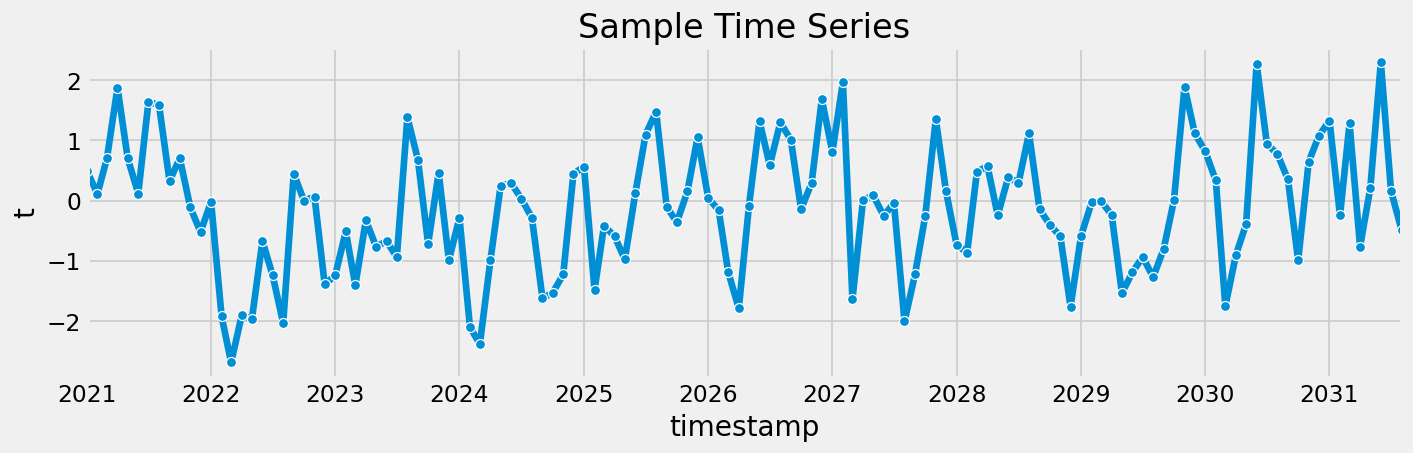

In [26]:
num_samples =  128

np.random.seed(SEED)
ar = np.r_[1, -np.array([alpha_1])] # add zero-lag and negate
ma = np.r_[1] # add zero-lag

sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=num_samples, freq='MS'),
                       't' : sm.tsa.arima_process.arma_generate_sample(ar, ma, num_samples)
                      })

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

In [27]:
# Check Stationarity
check_stationarity(sample['t'])

ADF Statistic: -6.918528
p-value: 0.000000
Critical Values:
	1%: -3.483
	5%: -2.885
	10%: -2.579
Stationary


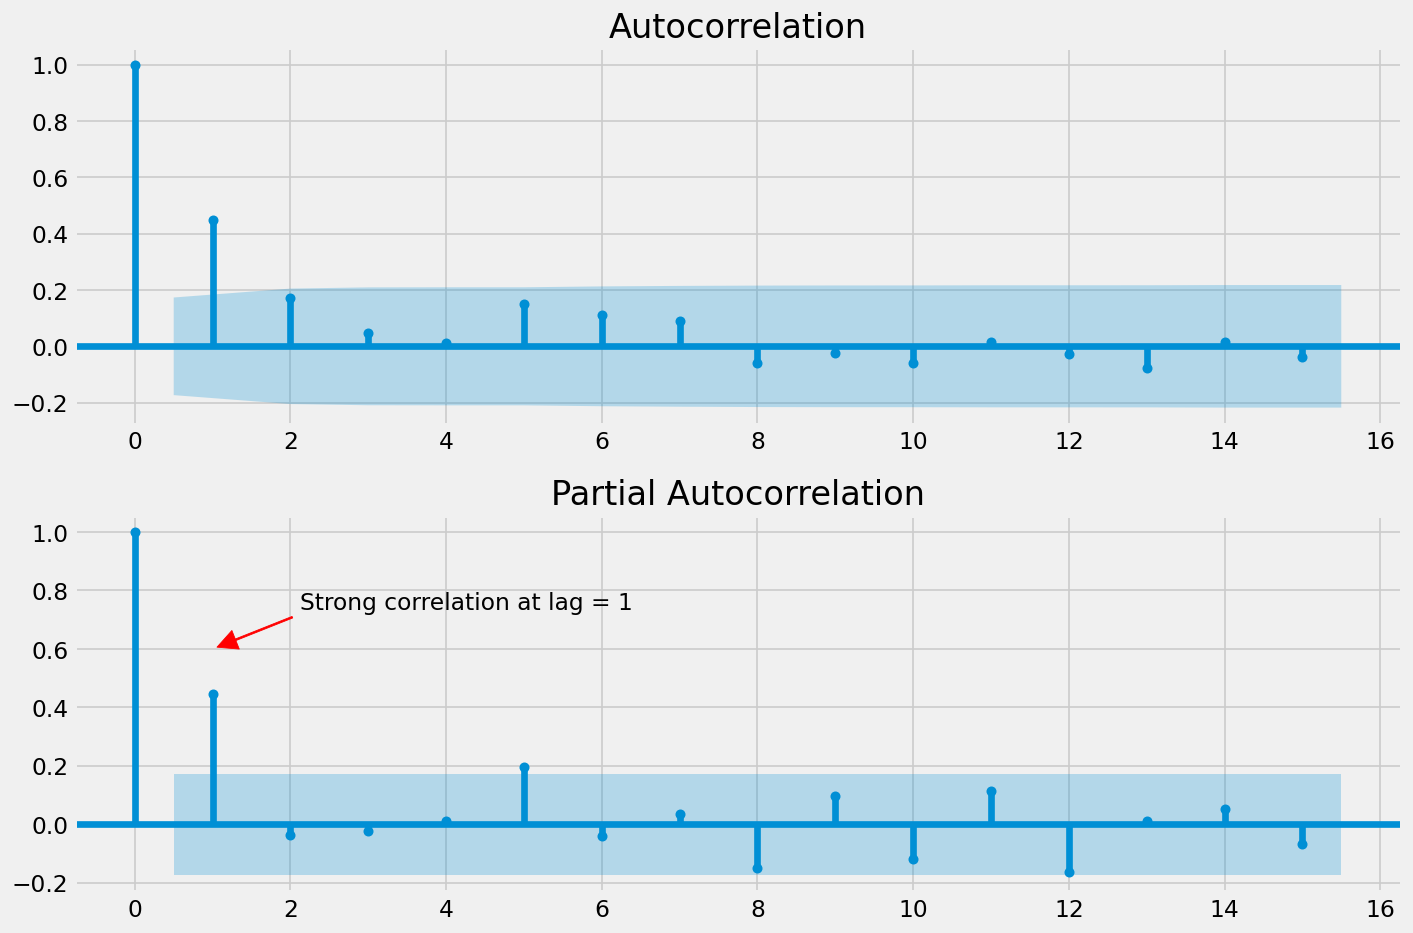

In [28]:
# Check ACF and PACF
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
plot_acf(sample['t'],lags=lag_acf, ax=ax[0])
plot_pacf(sample['t'],lags=lag_pacf, ax=ax[1], method='ols')

ax[1].annotate('Strong correlation at lag = 1', xy=(1, 0.6),  xycoords='data',
            xytext=(0.17, 0.75), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

plt.tight_layout()
plt.show()

                            AutoReg Model Results                             
Dep. Variable:                      t   No. Observations:                  102
Model:                     AutoReg(1)   Log Likelihood                -133.385
Method:               Conditional MLE   S.D. of innovations              0.906
Date:                Mon, 23 May 2022   AIC                             -0.137
Time:                        23:45:47   BIC                             -0.060
Sample:                             1   HQIC                            -0.106
                                  102                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1322      0.092     -1.434      0.152      -0.313       0.048
t.L1           0.4710      0.088      5.353      0.000       0.299       0.643
                                    Roots           

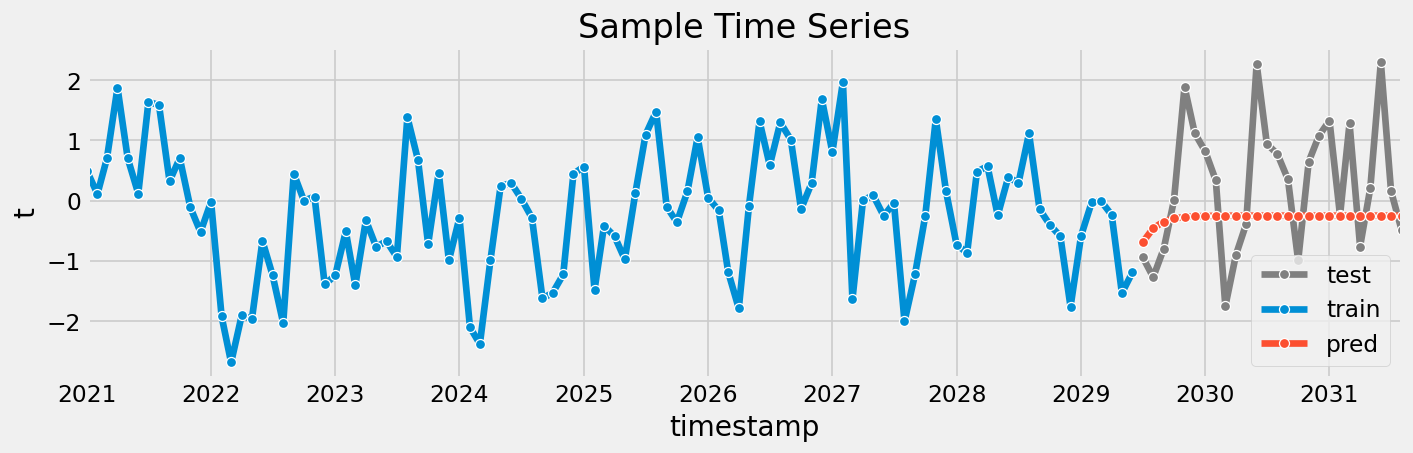

In [29]:
train_len = int(0.8* num_samples)

train = sample['t'][:train_len]
ar_model = AutoReg(train, lags=1).fit()

print(ar_model.summary())
pred = ar_model.predict(start=train_len, end=num_samples, dynamic=False)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.lineplot(x=sample.timestamp[train_len:num_samples], y=sample.t[train_len:num_samples], marker='o', label='test', color='grey')
sns.lineplot(x=sample.timestamp[:train_len], y=train, marker='o', label='train')
sns.lineplot(x=sample.timestamp[train_len:num_samples], y=pred, marker='o', label='pred')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

In [30]:
# AR(2) Process
alpha_1 = 0.5
alpha_2 = -0.5

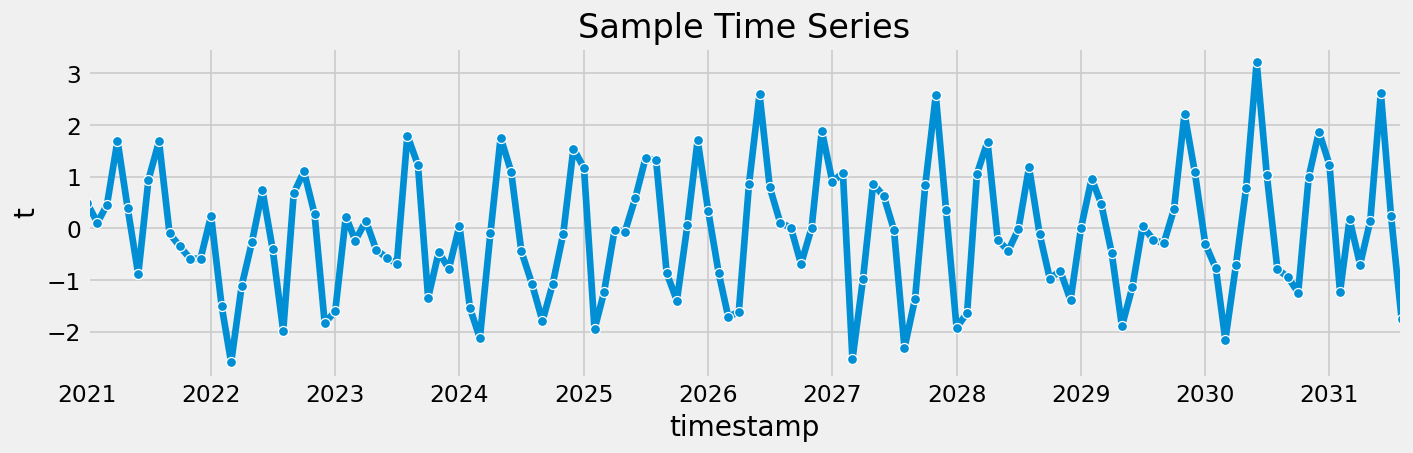

In [31]:
np.random.seed(SEED)
ar = np.r_[1, -np.array([alpha_1, alpha_2])] # add zero-lag and negate
ma = np.r_[1] # add zero-lag

sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=num_samples, freq='MS'),
                       't' : sm.tsa.arima_process.arma_generate_sample(ar, ma, num_samples)
                      })

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

In [32]:
# Check Stationarity
check_stationarity(sample['t'])

ADF Statistic: -9.171375
p-value: 0.000000
Critical Values:
	1%: -3.484
	5%: -2.885
	10%: -2.579
Stationary


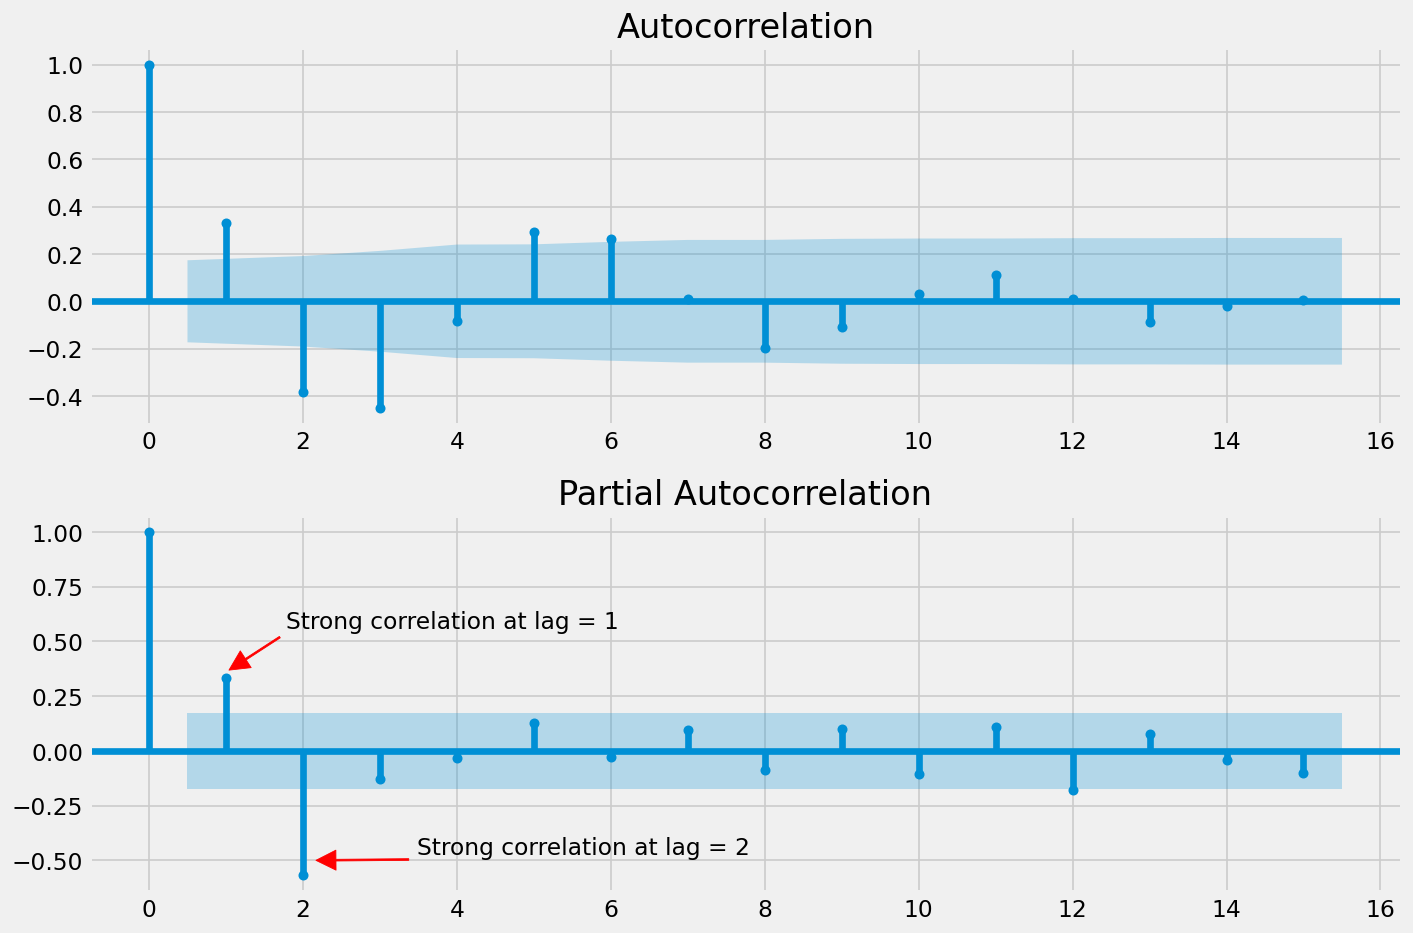

In [33]:
# Check ACF and PACF
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
plot_acf(sample['t'],lags=lag_acf, ax=ax[0])
plot_pacf(sample['t'],lags=lag_pacf, ax=ax[1], method='ols')

ax[1].annotate('Strong correlation at lag = 1', xy=(1, 0.36),  xycoords='data',
            xytext=(0.15, 0.7), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

ax[1].annotate('Strong correlation at lag = 2', xy=(2.1, -0.5),  xycoords='data',
            xytext=(0.25, 0.1), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

plt.tight_layout()
plt.show()

                            AutoReg Model Results                             
Dep. Variable:                      t   No. Observations:                  102
Model:                     AutoReg(2)   Log Likelihood                -132.075
Method:               Conditional MLE   S.D. of innovations              0.906
Date:                Mon, 23 May 2022   AIC                             -0.116
Time:                        23:45:48   BIC                             -0.012
Sample:                             2   HQIC                            -0.074
                                  102                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1321      0.091     -1.446      0.148      -0.311       0.047
t.L1           0.5191      0.082      6.363      0.000       0.359       0.679
t.L2          -0.5855      0.082     -7.103      0.0

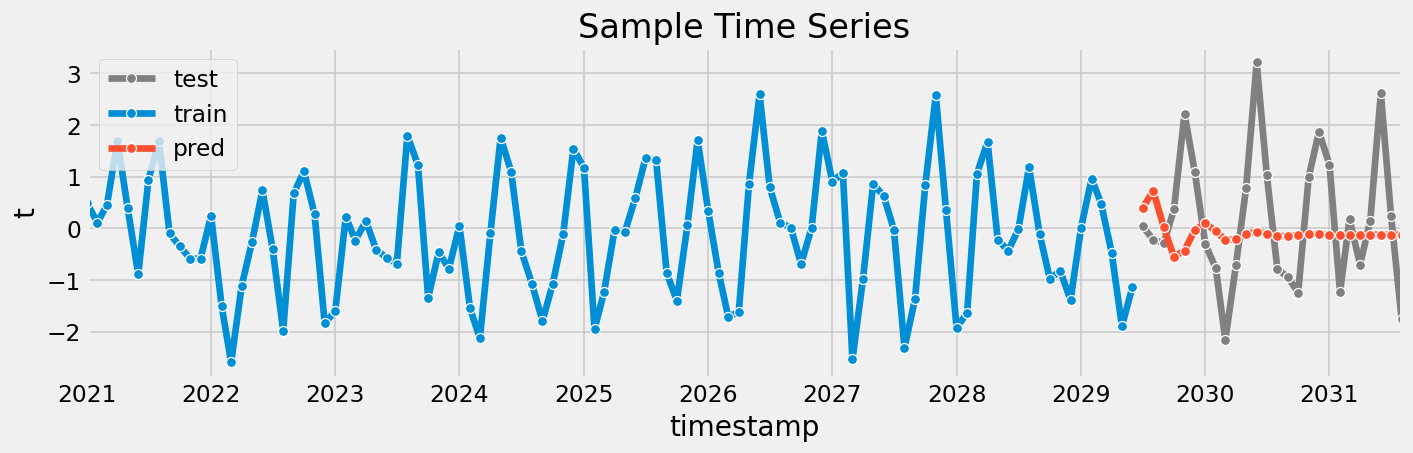

In [34]:
# Modelling
train = sample['t'][:train_len]
ar_model = AutoReg(train, lags=2).fit()

print(ar_model.summary())
pred = ar_model.predict(start=train_len, end=num_samples, dynamic=False)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.lineplot(x=sample.timestamp[train_len:num_samples], y=sample.t[train_len:num_samples], marker='o', label='test', color='grey')
sns.lineplot(x=sample.timestamp[:train_len], y=train, marker='o', label='train')
sns.lineplot(x=sample.timestamp[train_len:num_samples], y=pred, marker='o', label='pred')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

In [35]:
# MA(1) Process
beta_1 = 0.5

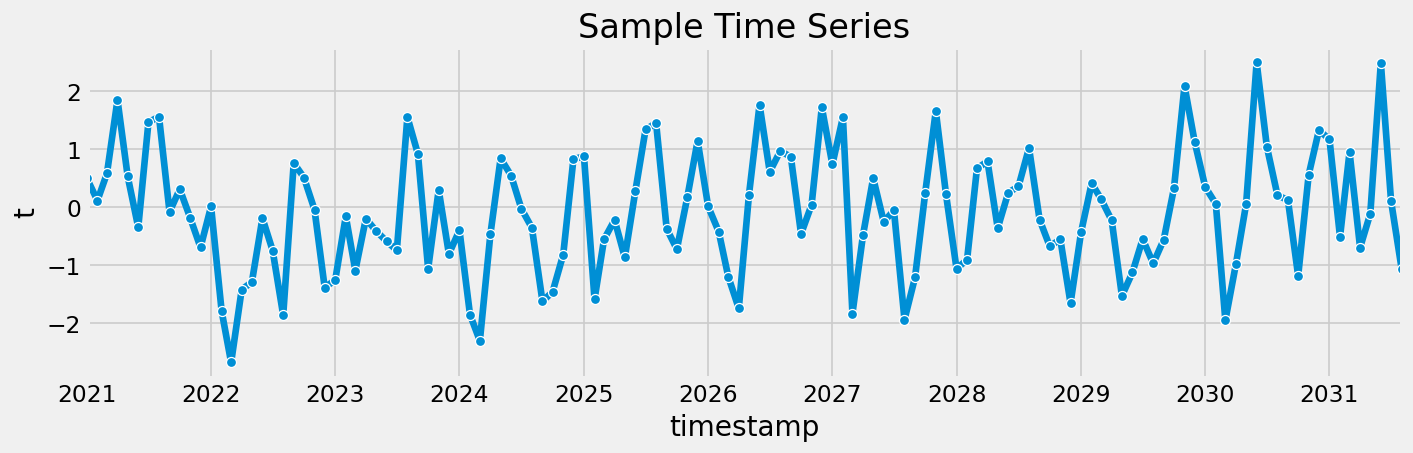

In [36]:
np.random.seed(SEED)
ar = np.r_[1] # add zero-lag and negate
ma = np.r_[1, np.array([beta_1])] # add zero-lag

sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=num_samples, freq='MS'),
                       't' : sm.tsa.arima_process.arma_generate_sample(ar, ma, num_samples)
                      })

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

In [37]:
# Check Stationarity
check_stationarity(sample['t'])

ADF Statistic: -7.933570
p-value: 0.000000
Critical Values:
	1%: -3.483
	5%: -2.885
	10%: -2.579
Stationary


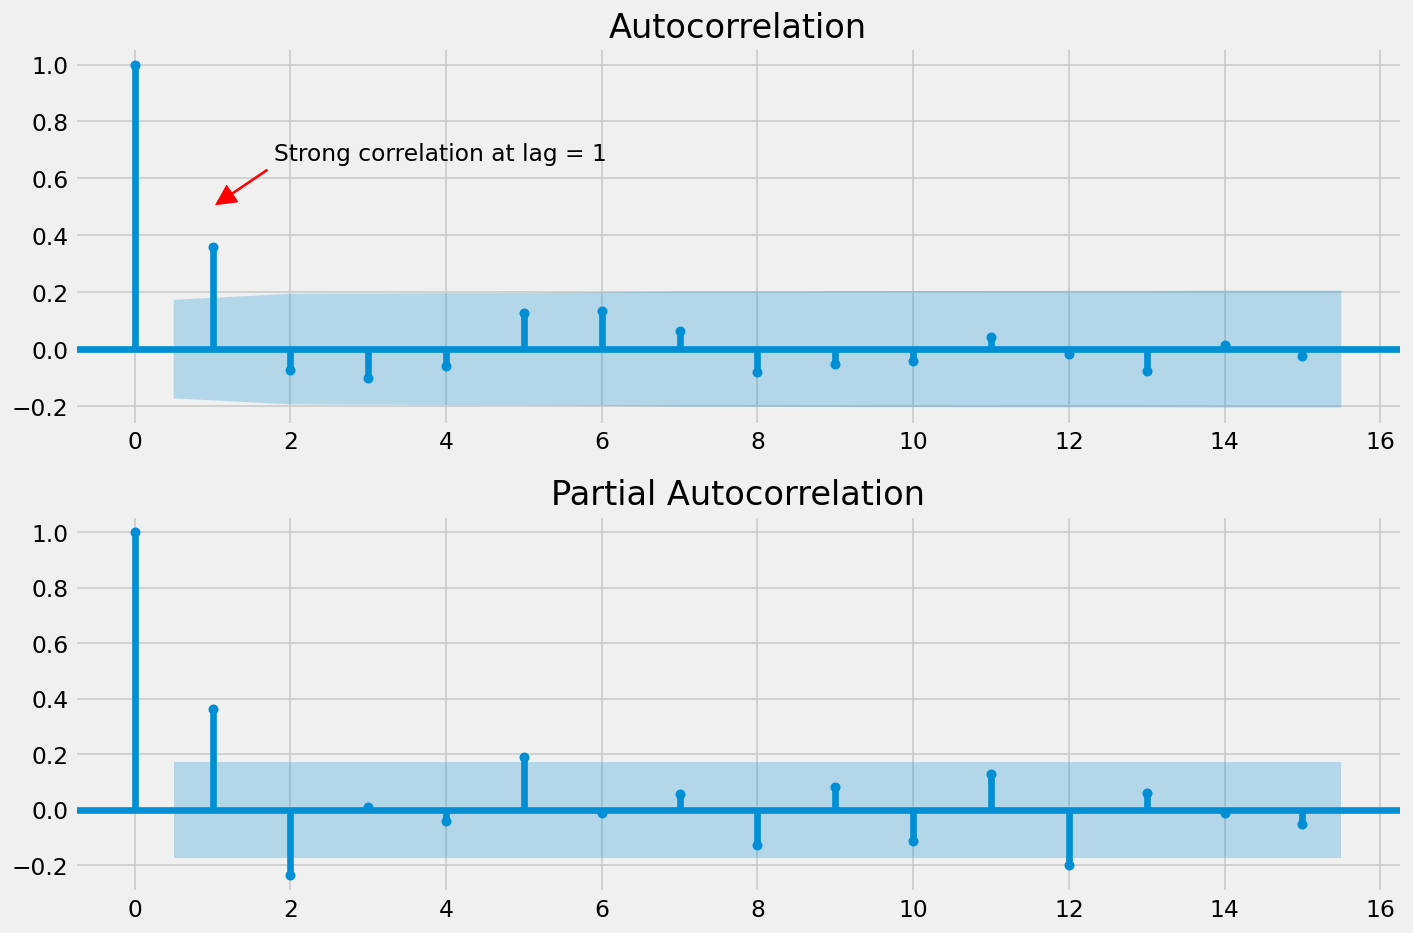

In [38]:
# Check ACF and PACF
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
plot_acf(sample['t'],lags=lag_acf, ax=ax[0])
plot_pacf(sample['t'],lags=lag_pacf, ax=ax[1], method='ols')

ax[0].annotate('Strong correlation at lag = 1', xy=(1, 0.5),  xycoords='data',
            xytext=(0.15, 0.7), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

plt.tight_layout()
plt.show()

                              ARMA Model Results                              
Dep. Variable:                      t   No. Observations:                  102
Model:                     ARMA(0, 1)   Log Likelihood                -134.613
Method:                       css-mle   S.D. of innovations              0.904
Date:                Mon, 23 May 2022   AIC                            275.227
Time:                        23:45:49   BIC                            283.102
Sample:                             0   HQIC                           278.415
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1765      0.135     -1.303      0.192      -0.442       0.089
ma.L1.t        0.5172      0.100      5.173      0.000       0.321       0.713
                                    Roots           

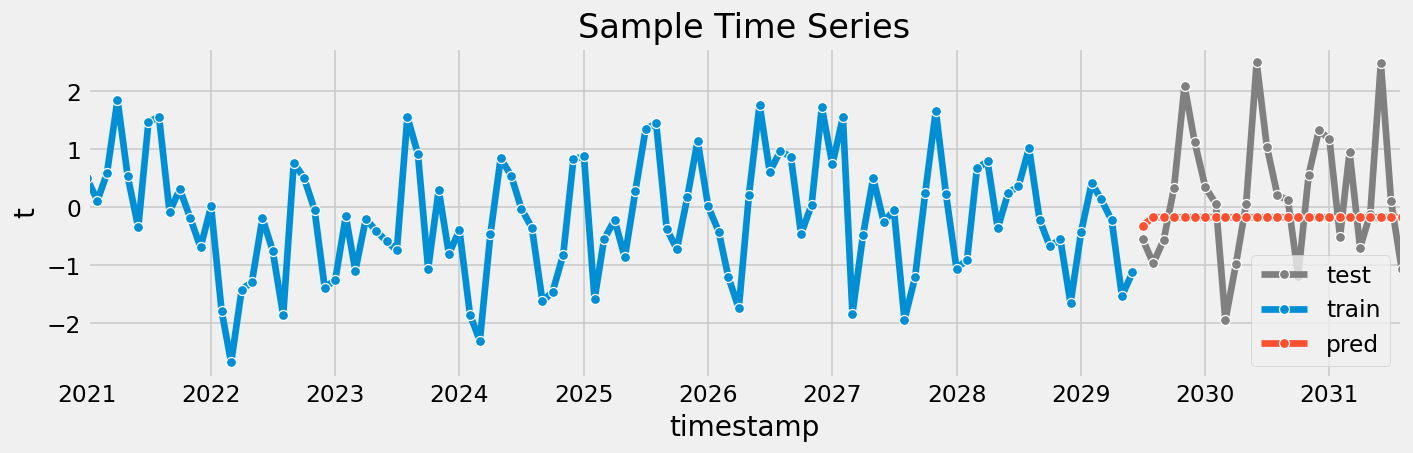

In [39]:
train = sample['t'][:train_len]
ma_model = ARMA(train, order=(0,1)).fit()

print(ma_model.summary())
pred = ma_model.predict(start=train_len, end=num_samples, dynamic=False)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.lineplot(x=sample.timestamp[train_len:num_samples], y=sample.t[train_len:num_samples], marker='o', label='test', color='grey')
sns.lineplot(x=sample.timestamp[:train_len], y=train, marker='o', label='train')
sns.lineplot(x=sample.timestamp[train_len:num_samples], y=pred, marker='o', label='pred')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

In [40]:
# MA(2) Process
beta_1 = 0.5
beta_2 = 0.5

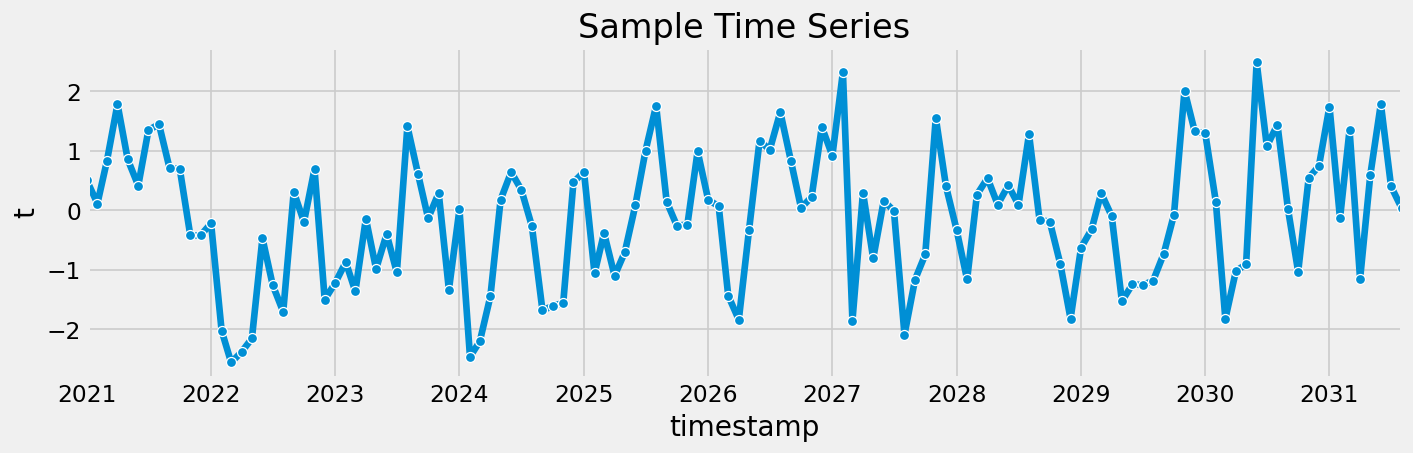

In [41]:
np.random.seed(SEED)
ar = np.r_[1] # add zero-lag and negate
ma = np.r_[1, np.array([beta_1, beta_2])] # add zero-lag

sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=num_samples, freq='MS'),
                       't' : sm.tsa.arima_process.arma_generate_sample(ar, ma, num_samples)
                      })

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

In [42]:
# Check Stationarity
check_stationarity(sample['t'])

ADF Statistic: -3.882572
p-value: 0.002167
Critical Values:
	1%: -3.485
	5%: -2.886
	10%: -2.580
Stationary


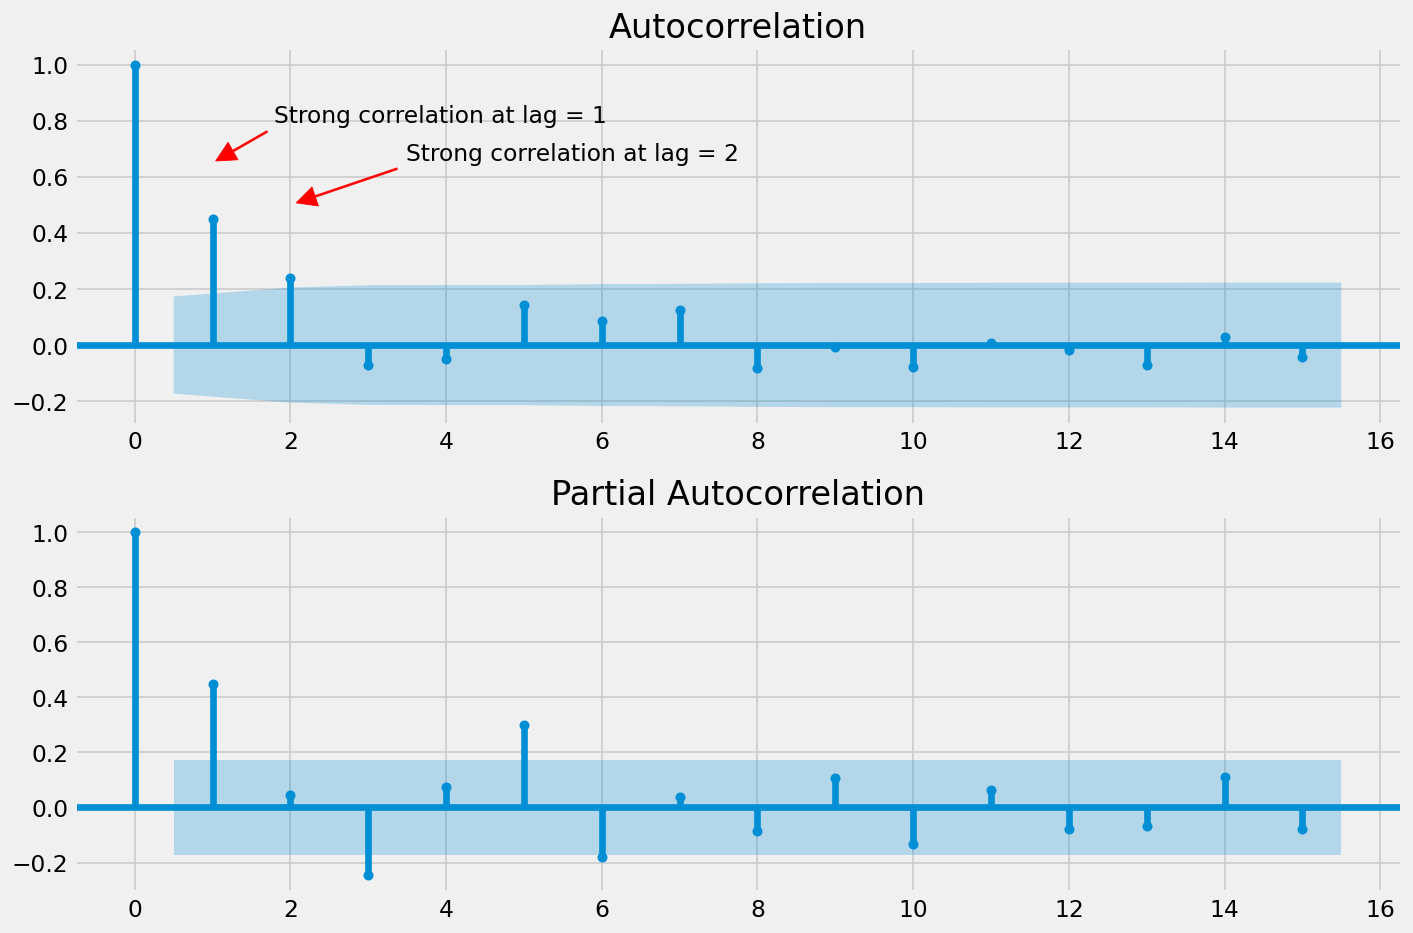

In [43]:
# Check ACF and PACF
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
plot_acf(sample['t'],lags=lag_acf, ax=ax[0])
plot_pacf(sample['t'],lags=lag_pacf, ax=ax[1], method='ols')

ax[0].annotate('Strong correlation at lag = 1', xy=(1, 0.65),  xycoords='data',
            xytext=(0.15, 0.8), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

ax[0].annotate('Strong correlation at lag = 2', xy=(2, 0.5),  xycoords='data',
            xytext=(0.25, 0.7), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

plt.tight_layout()
plt.show()

                              ARMA Model Results                              
Dep. Variable:                      t   No. Observations:                  102
Model:                     ARMA(0, 2)   Log Likelihood                -134.447
Method:                       css-mle   S.D. of innovations              0.900
Date:                Mon, 23 May 2022   AIC                            276.894
Time:                        23:45:50   BIC                            287.394
Sample:                             0   HQIC                           281.146
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2292      0.186     -1.230      0.219      -0.594       0.136
ma.L1.t        0.5226      0.084      6.235      0.000       0.358       0.687
ma.L2.t        0.5843      0.110      5.318      0.0

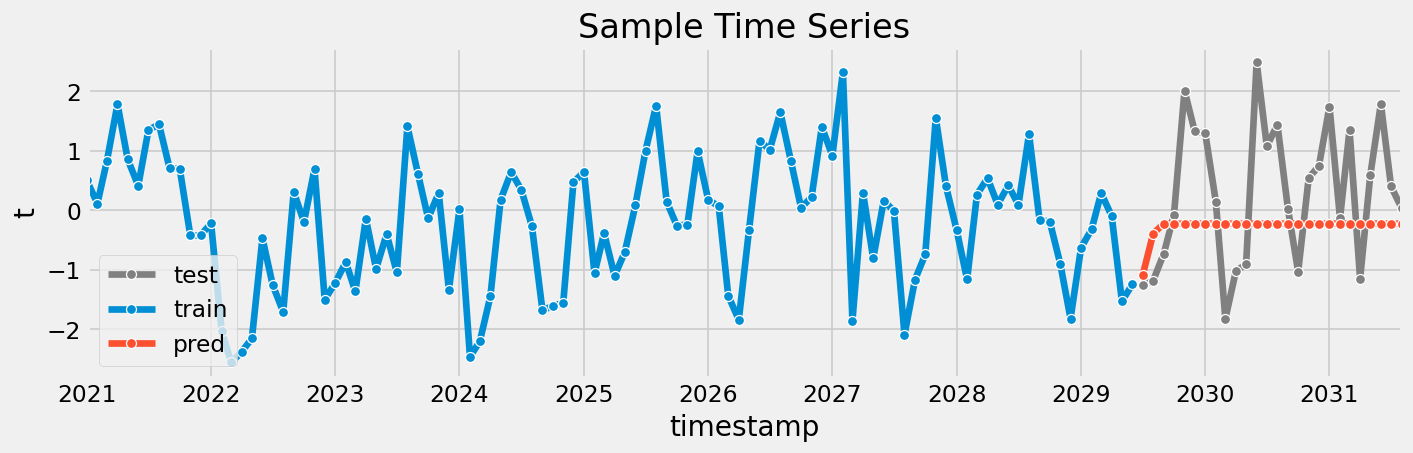

In [44]:
# Modelling
train = sample['t'][:train_len]
ma_model = ARMA(train, order=(0,2)).fit()

print(ma_model.summary())
pred = ma_model.predict(start=train_len, end=num_samples, dynamic=False)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.lineplot(x=sample.timestamp[train_len:num_samples], y=sample.t[train_len:num_samples], marker='o', label='test', color='grey')
sns.lineplot(x=sample.timestamp[:train_len], y=train, marker='o', label='train')
sns.lineplot(x=sample.timestamp[train_len:num_samples], y=pred, marker='o', label='pred')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

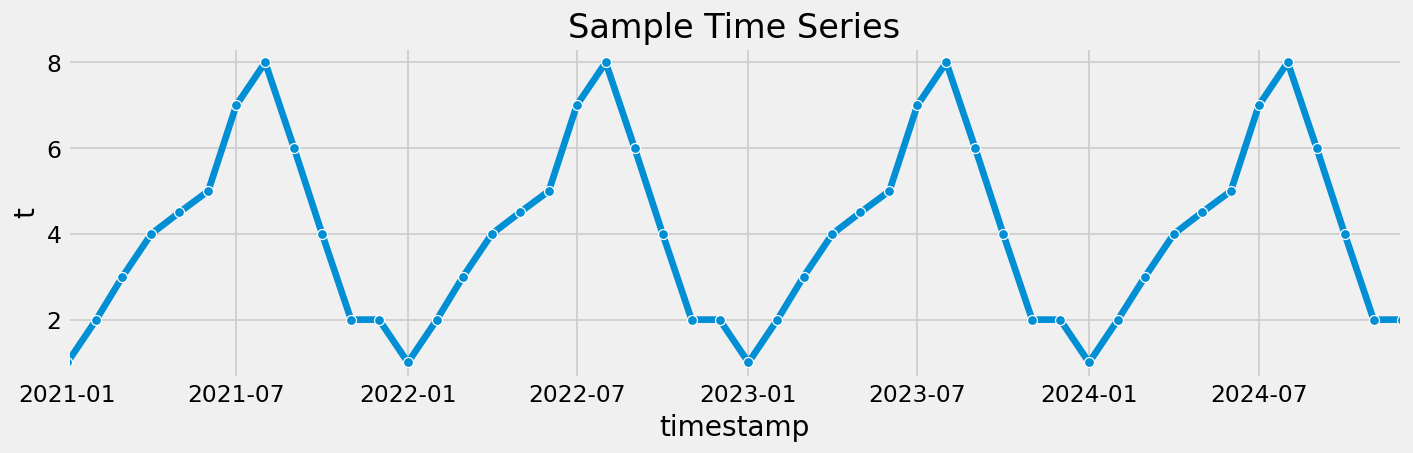

In [45]:
# Periodical
T = 12

sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=48, freq='MS'),
                       't' : [1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2, 1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2, 1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2, 1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2]
                      })

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

In [46]:
# Check Stationarity
check_stationarity(sample['t'])

ADF Statistic: -36779021201273.859375
p-value: 0.000000
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610
Stationary


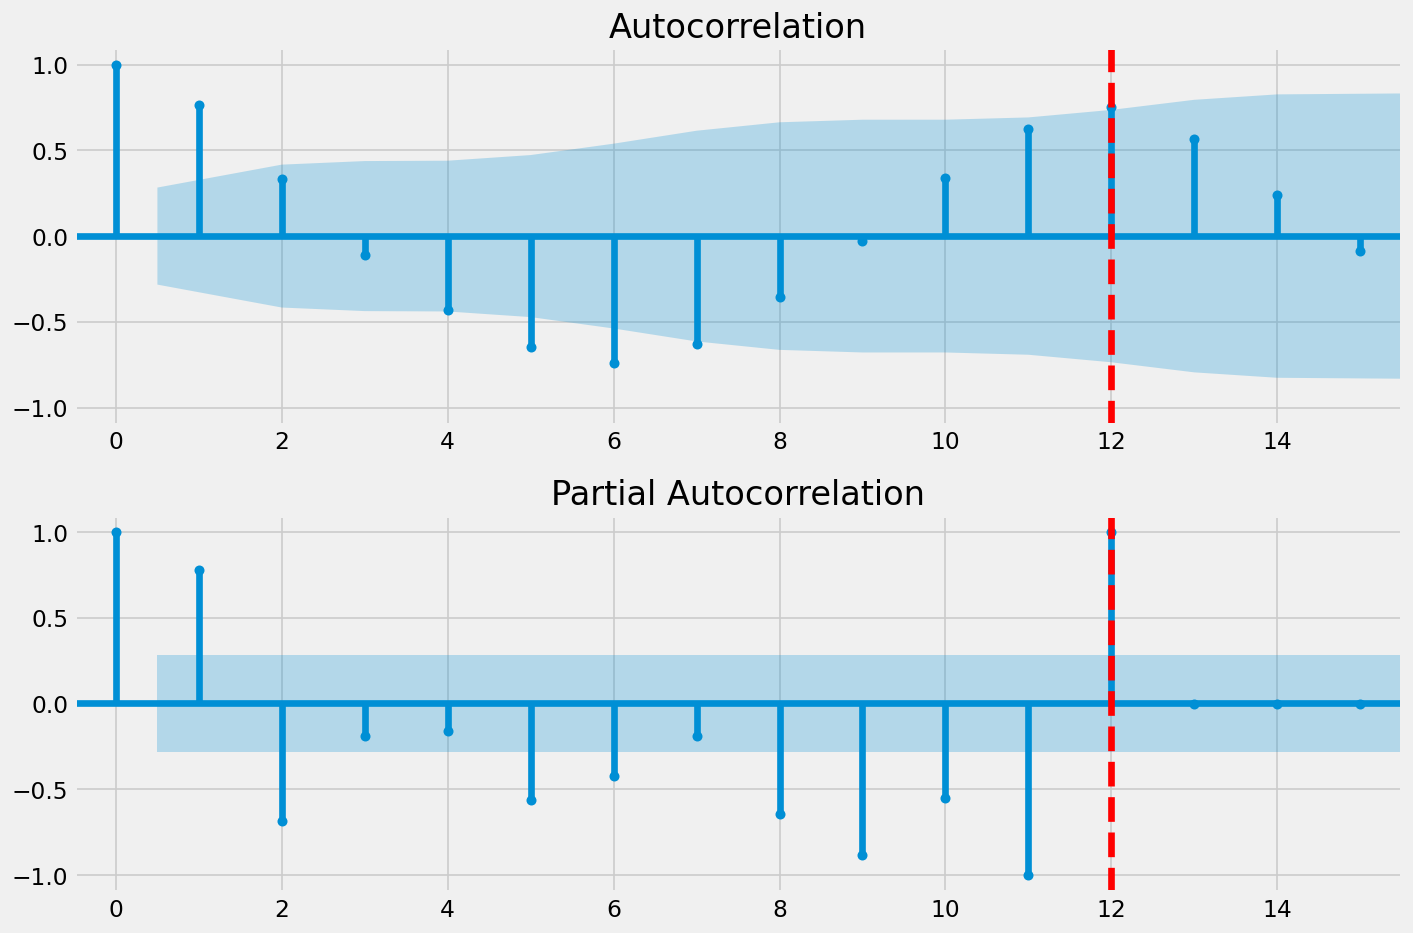

In [47]:
# Check ACF and PACF
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
plot_acf(sample['t'],lags=lag_acf, ax=ax[0])
plot_pacf(sample['t'],lags=lag_pacf, ax=ax[1], method='ols')

for i in range(2):
    ax[i].axvline(x=T, color='r', linestyle='--')
    ax[i].set_xlim([-0.5, lag_acf+0.5])
    ax[i].set_ylim([-1.1, 1.1])
    
plt.tight_layout()
plt.show()

In [48]:
# Modelling
train = sample['t'][:26]
ar_model = AutoReg(train, lags=12).fit()

print(ar_model.summary())
pred = ar_model.predict(start=26, end=48, dynamic=False)

                            AutoReg Model Results                             
Dep. Variable:                      t   No. Observations:                   26
Model:                    AutoReg(12)   Log Likelihood                 434.589
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Mon, 23 May 2022   AIC                            -62.922
Time:                        23:45:51   BIC                            -62.283
Sample:                            12   HQIC                           -62.981
                                   26                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0205   7.92e-18   2.59e+15      0.000       0.021       0.021
t.L1          -0.0004   4.93e-15  -8.58e+10      0.000      -0.000      -0.000
t.L2          -0.0004   5.05e-15  -8.37e+10      0.0

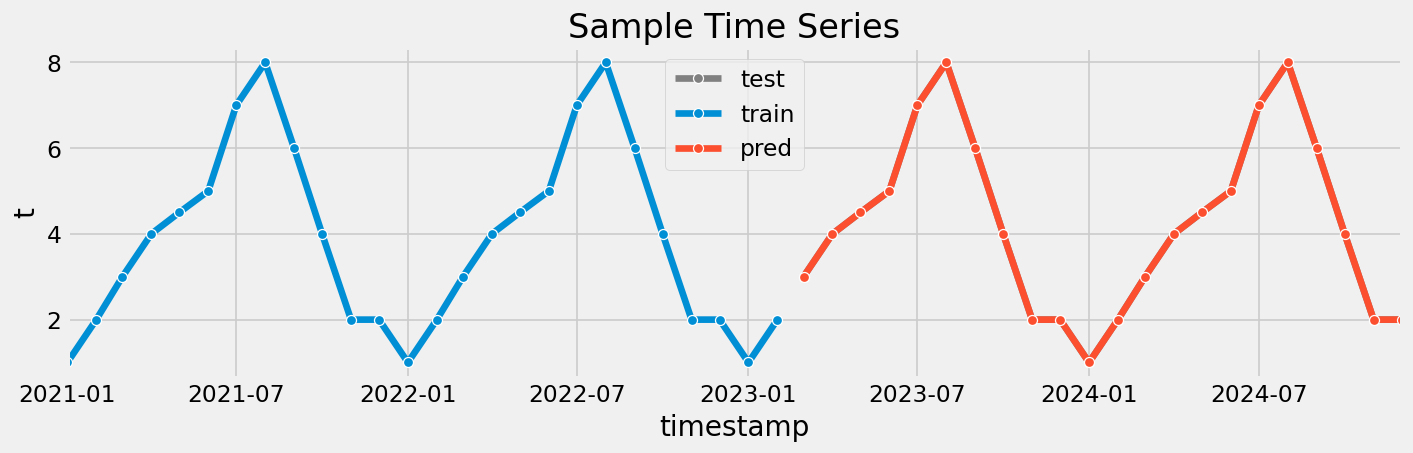

In [49]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.lineplot(x=sample.timestamp[26:48], y=sample.t[26:48], marker='o', label='test', color='grey')
sns.lineplot(x=sample.timestamp[:26], y=train, marker='o', label='train')
sns.lineplot(x=sample.timestamp[26:48], y=pred, marker='o', label='pred')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

# Several ACF and PACF Plots have been plot

# Task Q4. Exponential smoothing using Holt-Winter’s technique and Forecast onion price for Mumbai market

In [50]:
# Importing Necessary Libraries
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing

(10227, 9)
             market  year  quantity  priceMin  priceMax  priceMod state  \
month                                                                     
January  ABOHAR(PB)  2005      2350       404       493       446    PB   
January  ABOHAR(PB)  2006       900       487       638       563    PB   
January  ABOHAR(PB)  2010       790      1283      1592      1460    PB   
January  ABOHAR(PB)  2011       245      3067      3750      3433    PB   
January  ABOHAR(PB)  2012      1035       523       686       605    PB   

           city          date  
month                          
January  ABOHAR  January-2005  
January  ABOHAR  January-2006  
January  ABOHAR  January-2010  
January  ABOHAR  January-2011  
January  ABOHAR  January-2012  


<AxesSubplot:xlabel='month'>

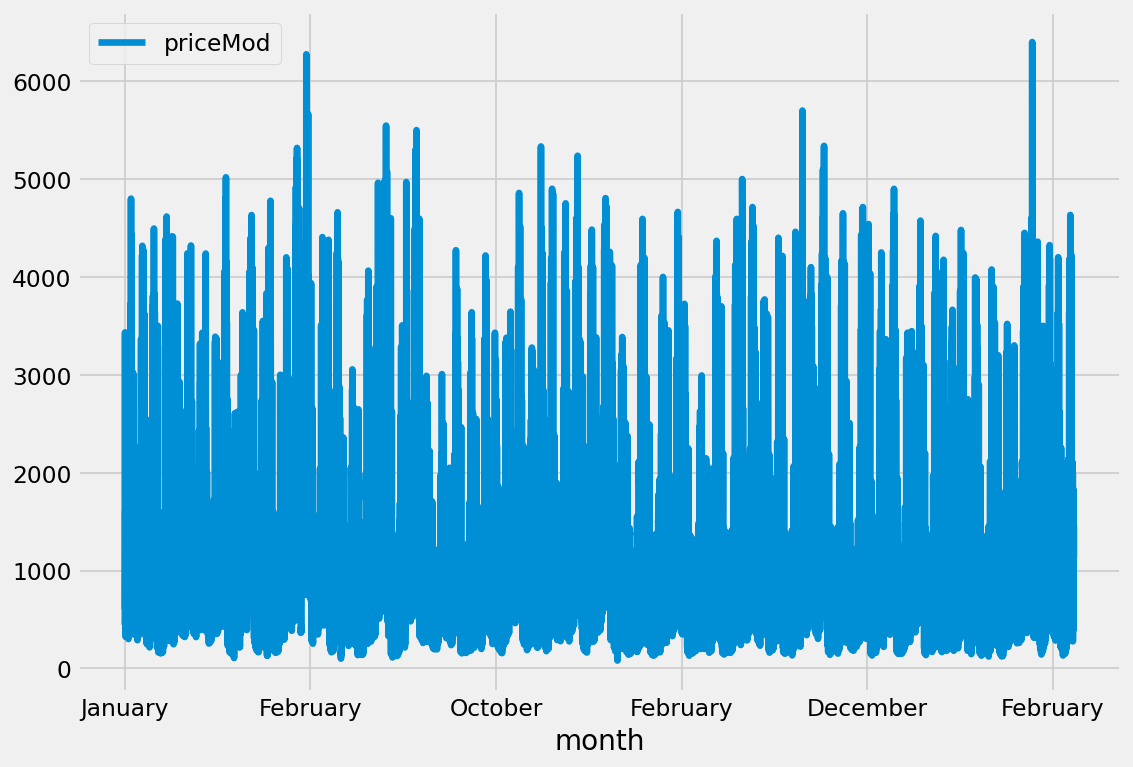

In [51]:
df =pd.read_csv('MonthWiseMarketArrivals_Clean.csv',index_col='month', parse_dates=True)
print(df.shape)
print(df.head()) # print the data frame
df[['priceMod']].plot()

In [52]:
df.sort_index(inplace=True)

In [53]:
df= df.loc[df.city == "MUMBAI"].copy()

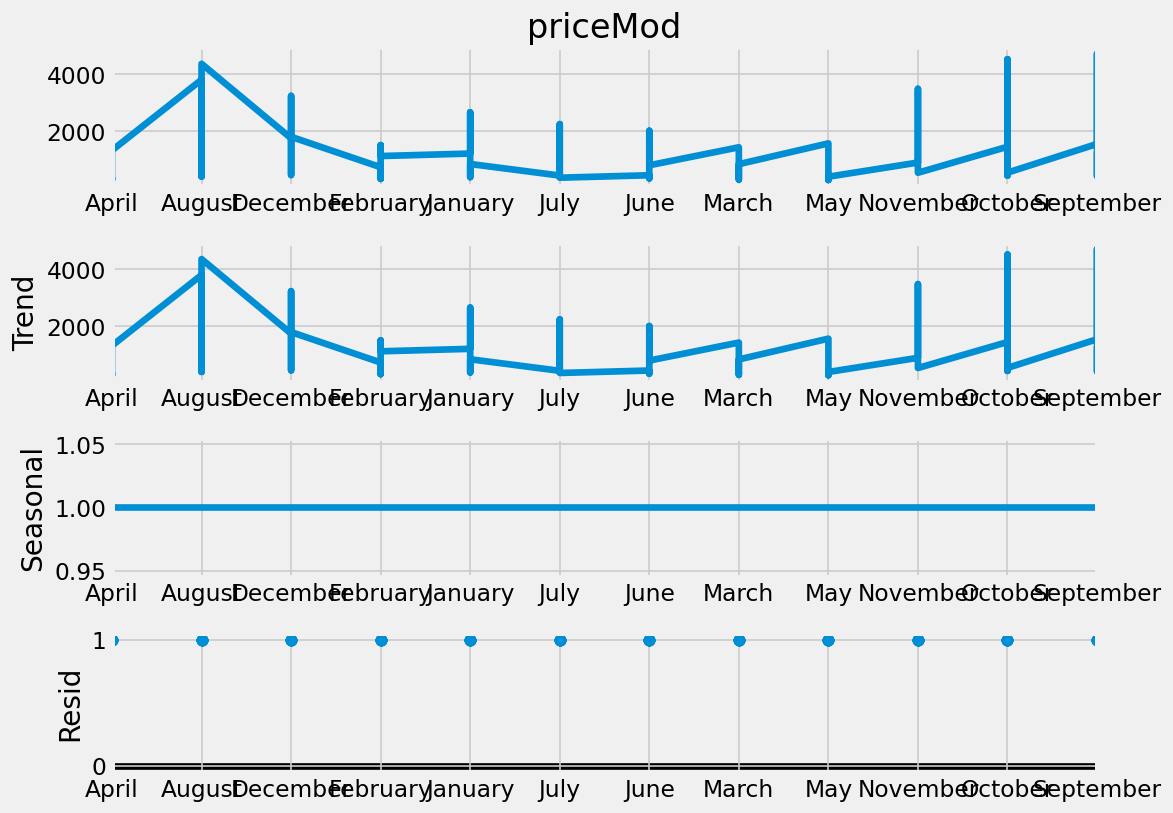

In [54]:
# Decompose the data frame to get the trend, seasonality and noise
decompose_result = seasonal_decompose(df['priceMod'],model='multiplicative',period=1)
decompose_result.plot()
plt.show()

In [55]:
# Set the value of Alpha and define x as the time period
x = 12
alpha = 1/(2*x)

<AxesSubplot:title={'center':'Holt Winters Single Exponential Smoothing grpah'}, xlabel='month'>

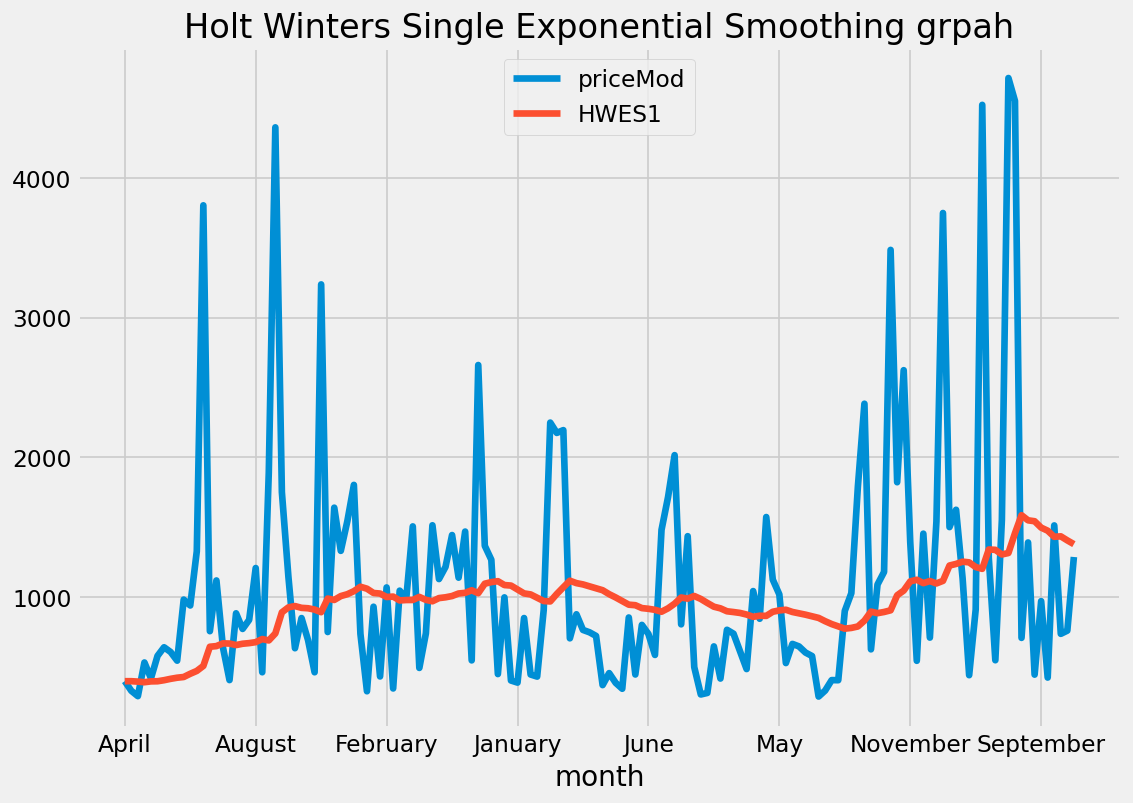

In [56]:
# Single exponential smoothing of the visitors data set
df['HWES1'] = SimpleExpSmoothing(df['priceMod']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues      
df[['priceMod','HWES1']].plot(title='Holt Winters Single Exponential Smoothing grpah')

<AxesSubplot:title={'center':'Holt Winters grapg: Additive Trend and Multiplicative Trend'}, xlabel='month'>

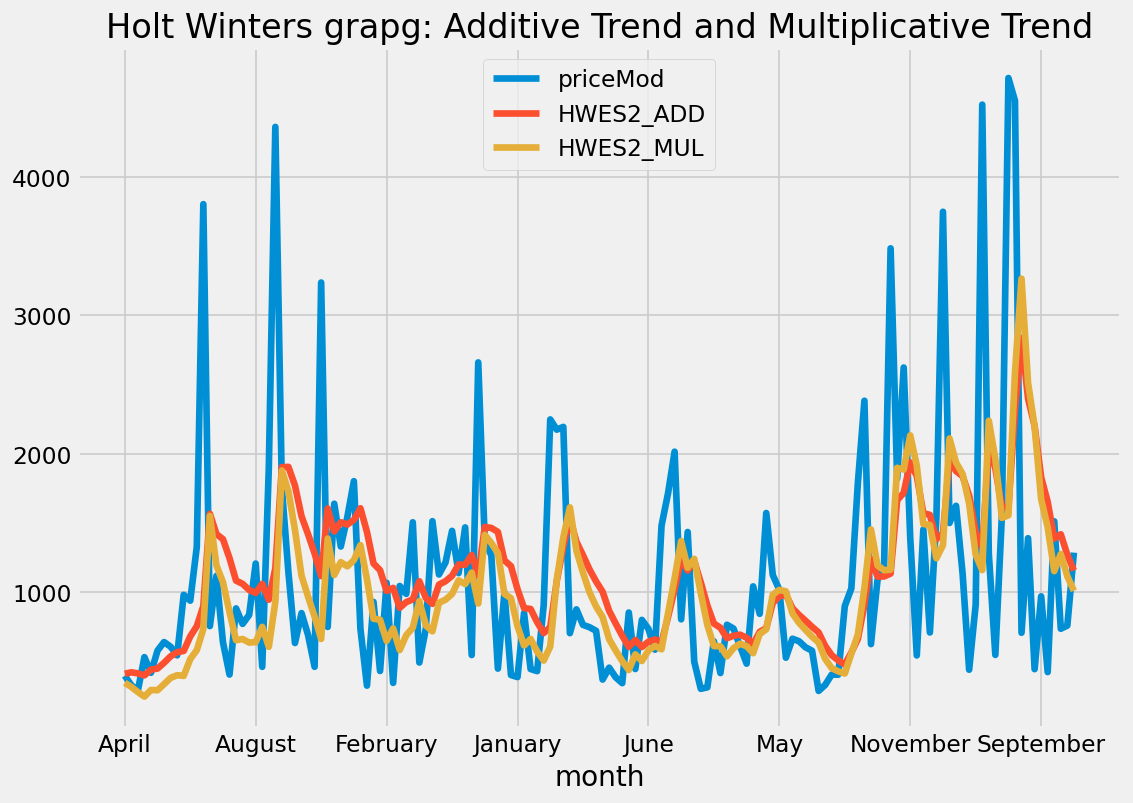

In [57]:
# Double exponential smoothing of visitors data set ( Additive and multiplicative)
df['HWES2_ADD'] = ExponentialSmoothing(df['priceMod'],trend='add').fit().fittedvalues
df['HWES2_MUL'] = ExponentialSmoothing(df['priceMod'],trend='mul').fit().fittedvalues
df[['priceMod','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters grapg: Additive Trend and Multiplicative Trend')

In [58]:
# Split into train and test set
train_priceMod = df[:120]
test_priceMod = df[120:]

In [59]:
df.shape

(146, 12)

Text(0.5, 1.0, 'Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

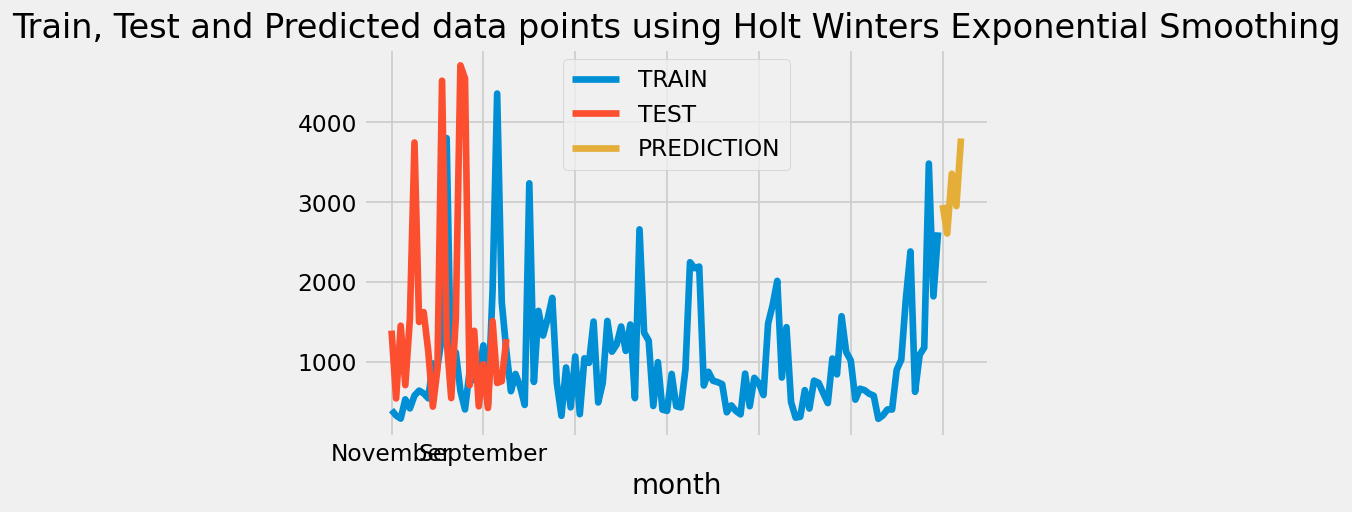

In [60]:
# Fit the model
fitted_model = ExponentialSmoothing(train_priceMod['priceMod'],trend='mul',seasonal='mul',seasonal_periods=2).fit()
test_predictions = fitted_model.forecast(5)
train_priceMod['priceMod'].plot(legend=True,label='TRAIN')
test_priceMod['priceMod'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

# Exponential smoothing using Holt-Winter’s technique and Forecast onion price for Mumbai market is Done

# Part II Completed